# Ephemeris conversion guide

In [1]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")


# These are the three API functions that are currently supported
from xradio.image import load_image, read_image, write_image

XRADIO version 0.0.41 already installed.


## Download dataset

https://open-bitbucket.nrao.edu/projects/CASA/repos/casatestdata/browse/unittest/tclean/venus_ephem_test.ms

In [2]:
import toolviper
ms_file = "venus_ephem_test.ms"
toolviper.utils.data.download(file=ms_file)

[2024-09-30 18:12:36,963]  WARNING   toolviper:  File exists: /Users/jsteeb/miniforge3/envs/zinc/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-09-30 18:12:36,963]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List        
 ───────────────────── 
  venus_ephem_test.ms

[2024-09-30 18:12:38,016]     INFO   toolviper:  File exists: venus_ephem_test.ms 


## Convert to Processing Set

In [3]:
from xradio.measurement_set import convert_msv2_to_processing_set


main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "venus_ephem_test.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel=False,
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2024-09-30 18:12:38,438]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBS_MODE', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-09-30 18:12:38,449]     INFO   toolviper:  Number of partitions: 7 
[2024-09-30 18:12:38,450]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [15 22 29 20], FIELD [1], SCAN [ 7 11] 
[2024-09-30 18:12:38,717]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [16 23 30 21], FIELD [2], SCAN [ 7 11] 
[2024-09-30 18:12:38,935]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [17 24 15 22], FIELD [3], SCAN [ 7 11] 
[2024-09-30 18:12:39,108]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [18 25 16 23], FIELD [0], SCAN [ 7 11] 
[2024-09-30 18:12:39,291]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [19 26 17 24], FIELD [4], SCAN [ 7 11] 
[2024-09-30 18:12:39,467]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [20 27 18 25], FIELD [5], SCAN [ 7 11] 
[2024-09-30 18:12:39,640]     INFO   

## Processing Set

In [4]:
ps_name = outfile

from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,venus_ephem_test_0,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_1],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
2,venus_ephem_test_1,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_2],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
5,venus_ephem_test_2,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_3],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
4,venus_ephem_test_3,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_0],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
3,venus_ephem_test_4,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_4],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
6,venus_ephem_test_5,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_5],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11
1,venus_ephem_test_6,[OBSERVE_TARGET#ON_SOURCE],"(20, 1128, 1, 2)","[XX, YY]","[7, 11]",X1847499280#ALMA_RB_06#BB_1#SW-01#FULL_RES_0,[Venus_6],[Venus_0],[OSSO_Line_1(ID=0)],Ephemeris,2.452498e+11,2.452498e+11


In [5]:
ps.keys()

dict_keys(['venus_ephem_test_0', 'venus_ephem_test_6', 'venus_ephem_test_1', 'venus_ephem_test_4', 'venus_ephem_test_3', 'venus_ephem_test_2', 'venus_ephem_test_5'])

In [6]:
ps["venus_ephem_test_0"]

<xarray.MeasurementSetXds> Size: 2MB
Dimensions:                     (baseline_id: 1128, time: 20, frequency: 1,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U9 41kB dask.array<chunksize=(1128,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U9 41kB dask.array<chunksize=(1128,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 9kB 0 1 2 ... 1125 1126 1127
    scan_number                 (time) int64 160B dask.array<chunksize=(20,), meta=np.ndarray>
  * time                        (time) float64 160B 1.547e+09 ... 1.547e+09
  * frequency                   (frequency) float64 8B 2.452e+11
  * polarization                (polarization) <U2 16B 'XX' 'YY'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 180kB dask.array<chunksize=(20, 1128), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 45kB dask.array<chunksize=(20, 1128, 1, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 180kB dask.array<chunksize=(20, 1128), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 541kB dask.array<chunksize=(20, 1128, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 361kB dask.array<chunksize=(20, 1128, 1, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 180kB dask.array<chunksize=(20, 1128, 1, 2), meta=np.ndarray>
Attributes:
    creation_date:     2024-09-30T22:12:38.503151
    data_groups:       {'base': {'correlated_data': 'VISIBILITY', 'flag': 'FL...
    observation_info:  {'execution_block_UID': '<EntityRef entityId="uid://A0...
    partition_info:    {'field_name': ['Venus_1'], 'intents': ['OBSERVE_TARGE...
    processor_info:    {'sub_type': 'ALMA_CORRELATOR_MODE', 'type': 'CORRELAT...
    schema_version:    4.0.-9997
    type:              visibility
    xradio_version:    0.0.41
    antenna_xds:       <xarray.Dataset> Size: 7kB\nDimensions:               ...

In [7]:
ps["venus_ephem_test_0"].attrs[
    "antenna_xds"
]

<xarray.Dataset> Size: 7kB
Dimensions:                 (antenna_name: 47, cartesian_pos_label: 3,
                             receptor_label: 2, sky_dir_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U9 2kB 'DA41_A058' ... 'DV25_A006'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 1kB dask.array<chunksize=(47,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 376B dask.array<chunksize=(47, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
  * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
    station                 (antenna_name) <U4 752B dask.array<chunksize=(47,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 752B dask.array<chunksize=(47,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 376B dask.array<chunksize=(47,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 1kB dask.array<chunksize=(47, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 752B dask.array<chunksize=(47, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  ALMA
    relocatable_antennas:    True
    type:                    antenna

In [8]:
ps["venus_ephem_test_0"].VISIBILITY.attrs[
    "field_and_source_xds"
]

<xarray.Dataset> Size: 544B
Dimensions:                 (time_ephemeris: 2, sky_pos_label: 3,
                             line_label: 1, ellipsoid_pos_label: 3,
                             sky_dir_label: 2)
Coordinates:
  * ellipsoid_pos_label     (ellipsoid_pos_label) <U4 48B 'lon' 'lat' 'dist'
    field_name              <U7 28B ...
  * line_label              (line_label) <U21 84B '0'
    line_name               (line_label) <U17 68B dask.array<chunksize=(1,), meta=np.ndarray>
  * sky_dir_label           (sky_dir_label) <U3 24B 'ra' 'dec'
  * sky_pos_label           (sky_pos_label) <U4 48B 'ra' 'dec' 'dist'
    source_name             <U7 28B ...
  * time_ephemeris          (time_ephemeris) float64 16B 1.547e+09 1.547e+09
Data variables:
    FIELD_PHASE_CENTER      (time_ephemeris, sky_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    LINE_REST_FREQUENCY     (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    LINE_SYSTEMIC_VELOCITY  (line_label) float64 8B dask.array<chunksize=(1,), meta=np.ndarray>
    OBSERVER_POSITION       (ellipsoid_pos_label) float64 24B dask.array<chunksize=(3,), meta=np.ndarray>
    SOURCE_LOCATION         (time_ephemeris, sky_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
    SOURCE_RADIAL_VELOCITY  (time_ephemeris) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
    SUB_OBSERVER_DIRECTION  (time_ephemeris, ellipsoid_pos_label) float64 48B dask.array<chunksize=(2, 3), meta=np.ndarray>
Attributes:
    is_ephemeris:  True
    type:          field_and_source

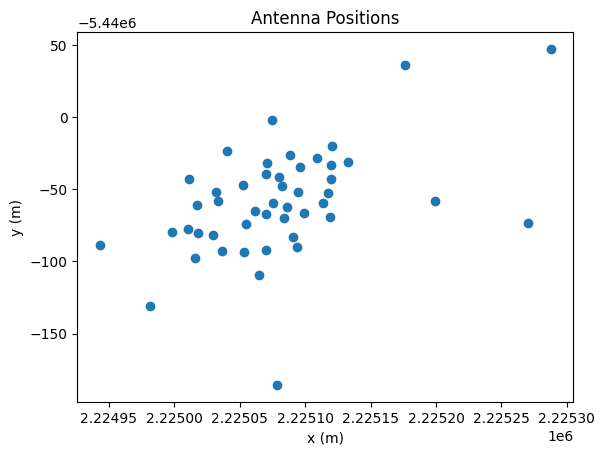

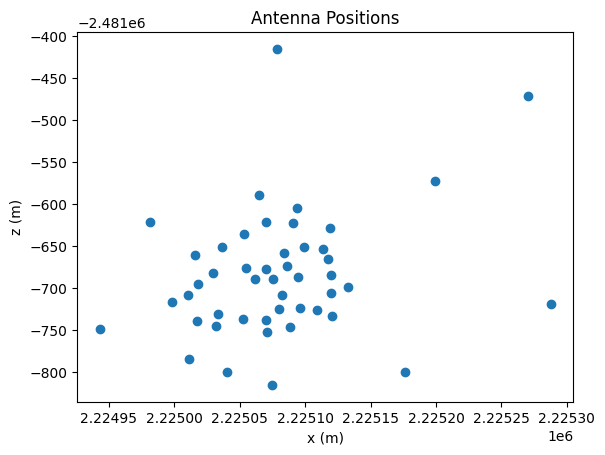

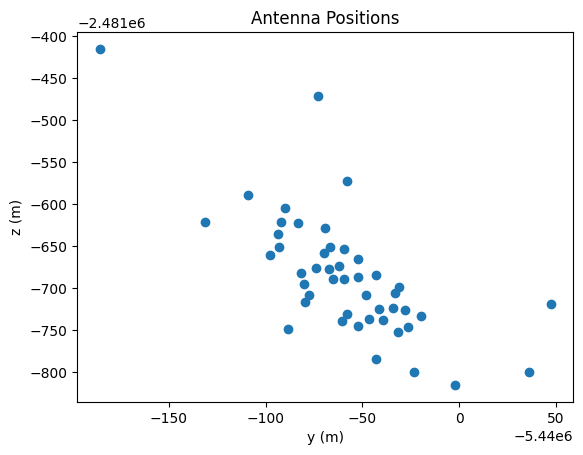

In [9]:
ps.plot_antenna_positions()

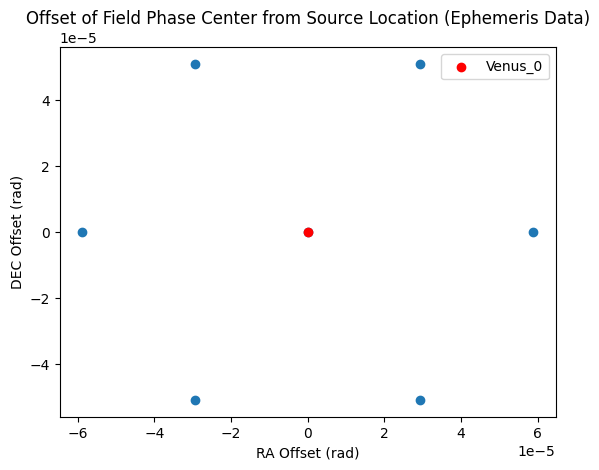

In [10]:
ps.plot_phase_centers()